In [50]:
import pandas as pd
import itertools
import re
import math
from urllib.parse import urlparse
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from PIL import Image # getting images in notebook
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

In [51]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/phishing_site_urls.csv')

In [52]:
df.head(20)

,URL,Label,text_tokenized,text_stemmed,text_sent,url_length,num_dots,num_digits,num_special_chars,num_subdirs,has_ip_address,is_https,tld,has_suspicious_words,entropy
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,malicious,"[nobell, it, ffb, d, dca, cce, f, login, skype...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,6,58,16,10,0,0,,1,4.996234
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,malicious,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,5,1,6,4,0,0,,0,4.686883
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,malicious,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,7,47,1,11,0,0,,1,4.721044
3,mail.printakid.com/www.online.americanexpress....,malicious,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,6,0,0,2,0,0,,0,4.079842
4,thewhiskeydregs.com/wp-content/themes/widescre...,malicious,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,1,21,2,10,0,0,,0,4.413995
5,smilesvoegol.servebbs.org/voegol.php,malicious,"[smilesvoegol, servebbs, org, voegol, php]","[smilesvoegol, servebb, org, voegol, php]",smilesvoegol servebb org voegol php,36,3,0,0,1,0,0,,0,3.607735
6,premierpaymentprocessing.com/includes/boleto-2...,malicious,"[premierpaymentprocessing, com, includes, bole...","[premierpaymentprocess, com, includ, boleto, v...",premierpaymentprocess com includ boleto via php,61,2,7,3,2,0,0,,0,4.481498
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,malicious,"[myxxxcollection, com, v, js, jih, bpd, com, d...","[myxxxcollect, com, v, js, jih, bpd, com, do, ...",myxxxcollect com v js jih bpd com do do l popu...,60,5,4,0,6,0,0,,0,4.296137
8,super1000.info/docs,malicious,"[super, info, docs]","[super, info, doc]",super info doc,19,1,4,0,1,0,0,,0,3.787144
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,malicious,"[horizonsgallery, com, js, bin, ssl, id, www, ...","[horizonsgalleri, com, js, bin, ssl, id, www, ...",horizonsgalleri com js bin ssl id www paypal c...,193,4,35,11,10,0,0,,1,4.954346


In [ ]:
df.shape

(103715, 2)

In [ ]:
df.describe()

,URL,Label
count,103715,103714
unique,103105,2
top,103.234.36.75/rd927.exe,bad
freq,27,55611


In [ ]:
df['Label'].value_counts()

,count
Label,
bad,55611
good,48103


In [ ]:
df['Label'] = df['Label'].replace({'good': 'safe', 'bad': 'malicious'})


In [ ]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,malicious
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,malicious
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,malicious
3,mail.printakid.com/www.online.americanexpress....,malicious
4,thewhiskeydregs.com/wp-content/themes/widescre...,malicious


In [ ]:
df.tail()

,URL,Label
103710,wonderworkerdenimlab.com/worssss/New_Drive/docx,malicious
103711,apache.com.ve/docs/gdn/index.php.htm,malicious
103712,digitaldream.cl/troves/3ebf7891048ab3aab6668c0...,malicious
103713,otecchile.com/guias/,malicious
103714,galvanosur.com.ar/galvanosur/includes/PEAR/log...,NaN


In [ ]:
df = df.dropna(subset=['URL', 'Label'])

In [ ]:
df = df.drop_duplicates(subset=['URL'])

In [ ]:
df['URL'] = df['URL'].astype(str).str.strip().str.lower()

In [ ]:
# Remove whitespace, unwanted characters
df['URL'] = df['URL'].apply(lambda u: re.sub(r'\s+', '', u))

In [ ]:
df.shape

(103104, 2)

In [ ]:
df.isnull().sum() # there is no missing values

,0
URL,0
Label,0


In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(df.Label.value_counts())

<Axes: xlabel='Label', ylabel='count'>

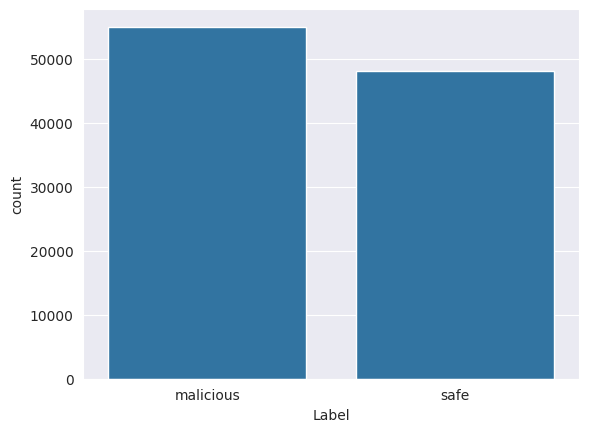

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts['count'])

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.skype.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'skype',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.9424688930000116 sec


In [ ]:
df.sample(5)

,URL,Label,text_tokenized
73687,www.physics.drexel.edu/students/courses/comp_p...,safe,"[www, physics, drexel, edu, students, courses,..."
74158,www.sco.com/skunkware/devtools/#erlang,safe,"[www, sco, com, skunkware, devtools, erlang]"
1784,rugont.pl/paypal_servicee.fr/@/paypa/france/,malicious,"[rugont, pl, paypal, servicee, fr, paypa, france]"
12758,www.times.uz/cli.php,malicious,"[www, times, uz, cli, php]"
76291,www.kielack.de/games.htm,safe,"[www, kielack, de, games, htm]"


In [ ]:
# give root words
stemmer = SnowballStemmer("english")

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 10.610190025999998 sec


In [ ]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed
99066,onlinksoft.org/dragon1/products/adobe.php?emai...,malicious,"[onlinksoft, org, dragon, products, adobe, php...","[onlinksoft, org, dragon, product, adob, php, ..."
86658,cis.stvincent.edu/wsh/,safe,"[cis, stvincent, edu, wsh]","[cis, stvincent, edu, wsh]"
44606,www.petfairy.ca/wp-content/plugins/flickrrss/p...,malicious,"[www, petfairy, ca, wp, content, plugins, flic...","[www, petfairi, ca, wp, content, plugin, flick..."
84221,www.google.com/toolbar/ie/,safe,"[www, google, com, toolbar, ie]","[www, googl, com, toolbar, ie]"
31281,secure.runescape.com.jjwow.asia/m=weblogin/log...,malicious,"[secure, runescape, com, jjwow, asia, m, weblo...","[secur, runescap, com, jjwow, asia, m, weblogi..."
41005,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,malicious,"[d, a, cb, a, a, s, sites, googlegroups, com, ...","[d, a, cb, a, a, s, site, googlegroup, com, si..."
28847,update.paypal.complaint-view.billing.activatio...,malicious,"[update, paypal, complaint, view, billing, act...","[updat, paypal, complaint, view, bill, activ, ..."
32409,artexam.ir/modules/mod_custom/paypal_priv8_us_...,malicious,"[artexam, ir, modules, mod, custom, paypal, pr...","[artexam, ir, modul, mod, custom, paypal, priv..."
71801,www.ddj.com/cpp/184403881,safe,"[www, ddj, com, cpp]","[www, ddj, com, cpp]"
51423,www.geoforum.com/contacts/bb/forum/index.asp?l...,safe,"[www, geoforum, com, contacts, bb, forum, inde...","[www, geoforum, com, contact, bb, forum, index..."


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.060046102000001156 sec


In [ ]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
92391,tolkienbattles.bravepages.com/index.html,safe,"[tolkienbattles, bravepages, com, index, html]","[tolkienbattl, bravepag, com, index, html]",tolkienbattl bravepag com index html
2573,account9915wu5991.jceucalypta.nl/wumt/?access=...,malicious,"[account, wu, jceucalypta, nl, wumt, access, s...","[account, wu, jceucalypta, nl, wumt, access, s...",account wu jceucalypta nl wumt access secur
91727,www.gamecabinet.com/sumo/issue5/respublica.html,safe,"[www, gamecabinet, com, sumo, issue, respublic...","[www, gamecabinet, com, sumo, issu, respublica...",www gamecabinet com sumo issu respublica html
30001,2lo.rz.pl/stulecie/news/img/be/more/safe/whit/...,malicious,"[lo, rz, pl, stulecie, news, img, be, more, sa...","[lo, rz, pl, stuleci, news, img, be, more, saf...",lo rz pl stuleci news img be more safe whit us...
63222,www.ctv.es/pckits/tisa.html,safe,"[www, ctv, es, pckits, tisa, html]","[www, ctv, es, pckit, tisa, html]",www ctv es pckit tisa html


In [55]:
!pip install tldextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 5.5 MB/s eta 0:00:00


In [56]:
import tldextract



In [57]:
def extract_features(df):
    suspicious_keywords = [
        'login', 'verify', 'update', 'secure', 'account', 'bank', 'free', 'bonus', 'gift', 'signin'
    ]

    df['url_length'] = df['URL'].apply(len)
    df['num_dots'] = df['URL'].apply(lambda x: x.count('.'))
    df['num_digits'] = df['URL'].apply(lambda x: sum(c.isdigit() for c in x))
    df['num_special_chars'] = df['URL'].apply(lambda x: len(re.findall(r'[-_@%&?=+]', x)))
    df['num_subdirs'] = df['URL'].apply(lambda x: x.count('/'))

    df['has_ip_address'] = df['URL'].apply(
        lambda x: 1 if re.search(r'(\d{1,3}\.){3}\d{1,3}', x) else 0
    )

    df['is_https'] = df['URL'].apply(lambda x: 1 if x.startswith('https') else 0)

    # ✅ Robust TLD extraction
    df['tld'] = df['URL'].apply(
        lambda x: tldextract.extract(str(x)).suffix if pd.notnull(x) else 'unknown'
    )

    df['tld'] = df['tld'].replace('', 'unknown').fillna('unknown')

    df['has_suspicious_words'] = df['URL'].apply(
        lambda x: 1 if any(word in x.lower() for word in suspicious_keywords) else 0
    )

    df['entropy'] = df['URL'].apply(shannon_entropy)

    return df


In [58]:
df = extract_features(df)


In [59]:
#sliceing classes
bad_sites = df[df.Label == 'malicious']
good_sites = df[df.Label == 'safe']

In [60]:
bad_sites.head(20)

,URL,Label,text_tokenized,text_stemmed,text_sent,url_length,num_dots,num_digits,num_special_chars,num_subdirs,has_ip_address,is_https,tld,has_suspicious_words,entropy
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,malicious,"[nobell, it, ffb, d, dca, cce, f, login, skype...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,6,58,16,10,0,0,it,1,4.996234
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,malicious,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,5,1,6,4,0,0,com,0,4.686883
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,malicious,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,7,47,1,11,0,0,com,1,4.721044
3,mail.printakid.com/www.online.americanexpress....,malicious,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,6,0,0,2,0,0,com,0,4.079842
4,thewhiskeydregs.com/wp-content/themes/widescre...,malicious,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,1,21,2,10,0,0,com,0,4.413995
5,smilesvoegol.servebbs.org/voegol.php,malicious,"[smilesvoegol, servebbs, org, voegol, php]","[smilesvoegol, servebb, org, voegol, php]",smilesvoegol servebb org voegol php,36,3,0,0,1,0,0,org,0,3.607735
6,premierpaymentprocessing.com/includes/boleto-2...,malicious,"[premierpaymentprocessing, com, includes, bole...","[premierpaymentprocess, com, includ, boleto, v...",premierpaymentprocess com includ boleto via php,61,2,7,3,2,0,0,com,0,4.481498
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,malicious,"[myxxxcollection, com, v, js, jih, bpd, com, d...","[myxxxcollect, com, v, js, jih, bpd, com, do, ...",myxxxcollect com v js jih bpd com do do l popu...,60,5,4,0,6,0,0,com,0,4.296137
8,super1000.info/docs,malicious,"[super, info, docs]","[super, info, doc]",super info doc,19,1,4,0,1,0,0,info,0,3.787144
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,malicious,"[horizonsgallery, com, js, bin, ssl, id, www, ...","[horizonsgalleri, com, js, bin, ssl, id, www, ...",horizonsgalleri com js bin ssl id www paypal c...,193,4,35,11,10,0,0,com,1,4.954346


In [61]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent,url_length,num_dots,num_digits,num_special_chars,num_subdirs,has_ip_address,is_https,tld,has_suspicious_words,entropy
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,safe,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...,552,7,28,21,6,0,0,com,0,7.015933
18232,wwweira¯&nvinip¿nch¯wvö%æåydahðû/ïyeùuëó6(r...,safe,"[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...,339,0,18,13,2,0,0,unknown,0,7.023123
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,safe,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...,324,3,13,12,4,0,0,unknown,0,6.884200
18234,yìêkoãõ»î§déîl½ñ¡ââqtò¸/à;í,safe,"[y, ko, d, l, qt]","[y, ko, d, l, qt]",y ko d l qt,31,0,0,0,1,0,0,unknown,0,4.825164
18236,ruta89fm.com/images/as@vies/1i75cf7b16vc<fd16...,safe,"[ruta, fm, com, images, as, vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...,303,2,33,6,5,0,0,com,0,6.863781


In [62]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [63]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

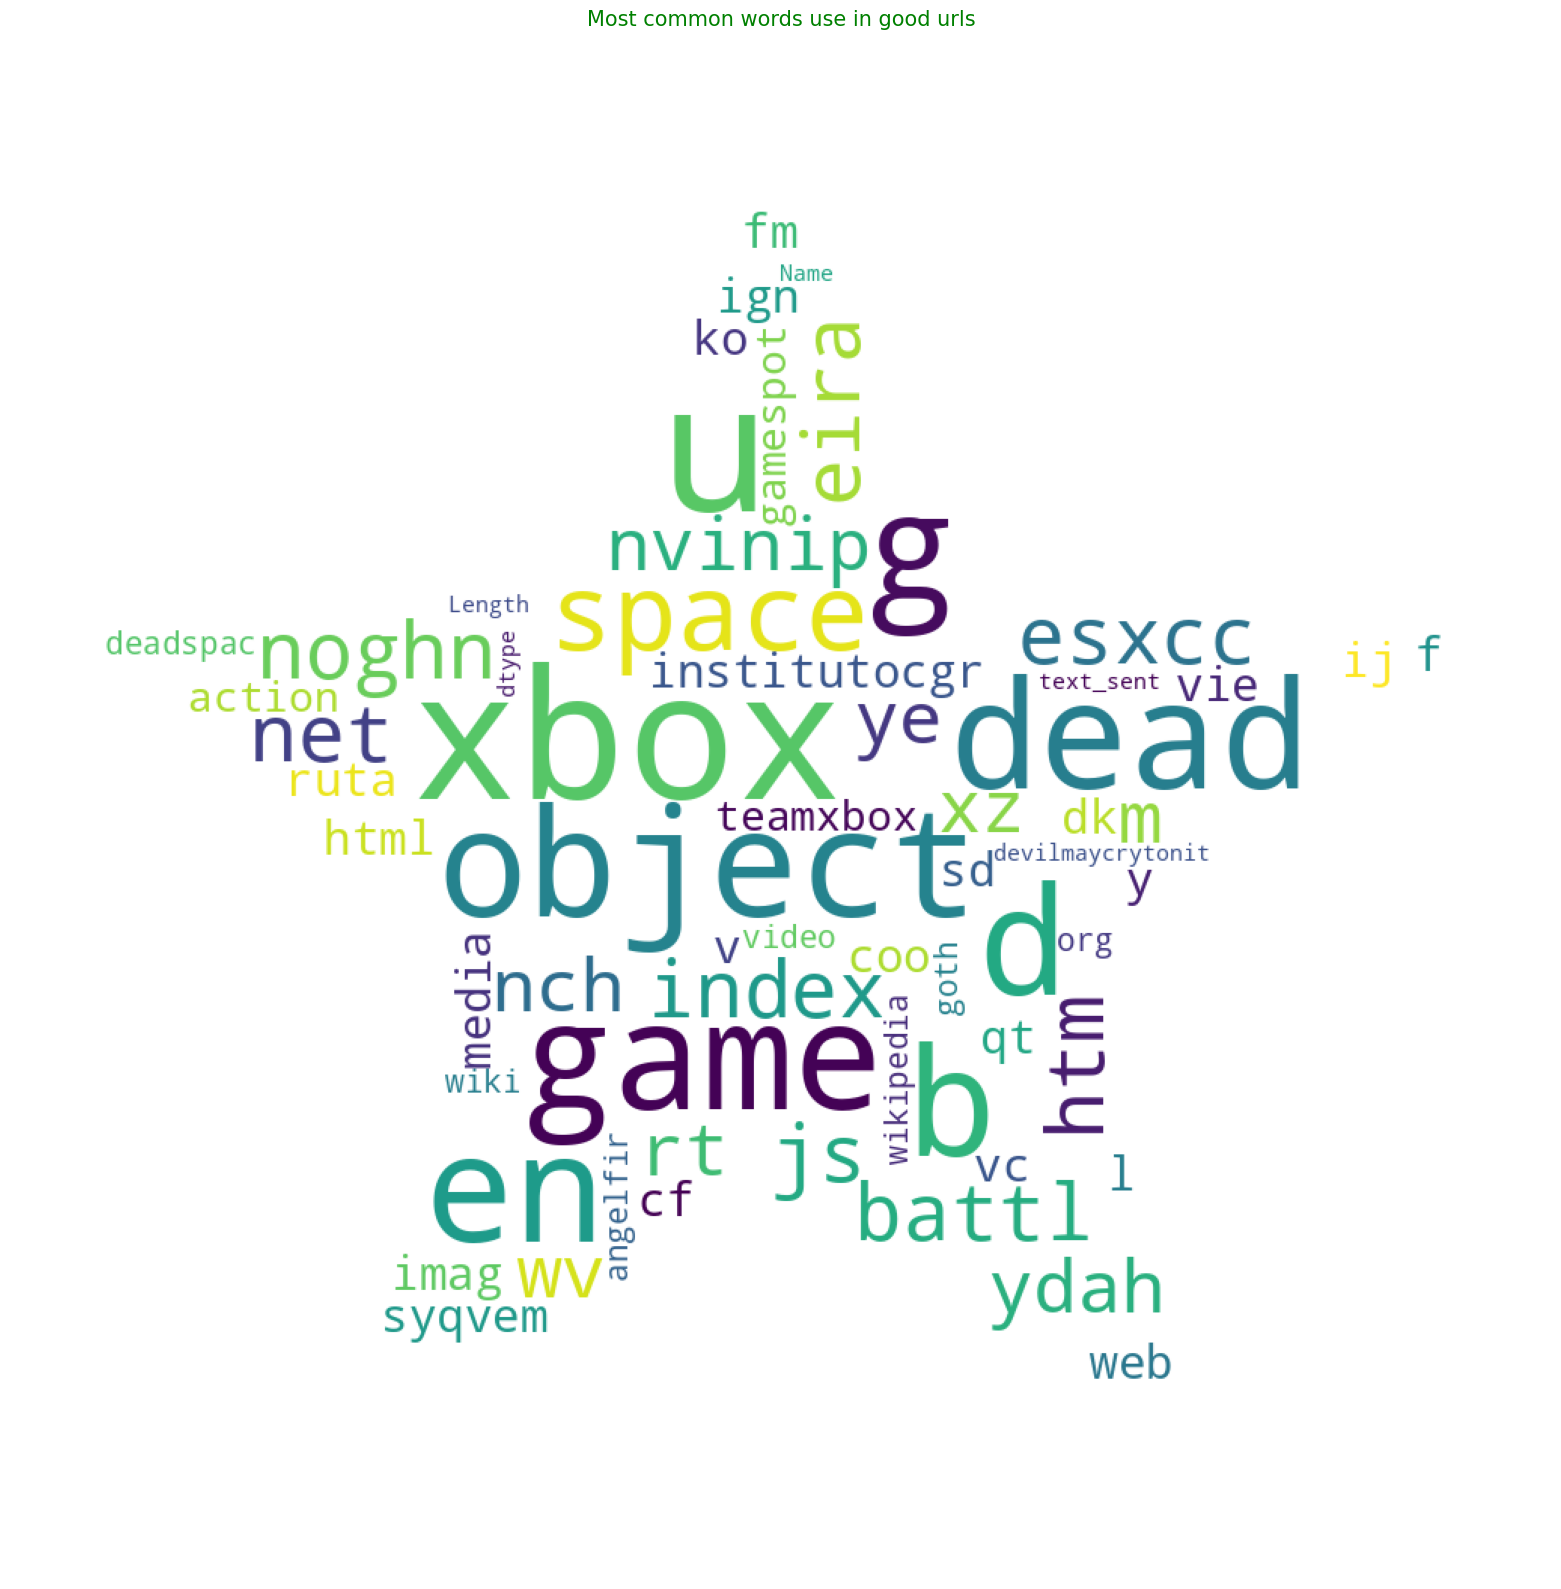

In [64]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

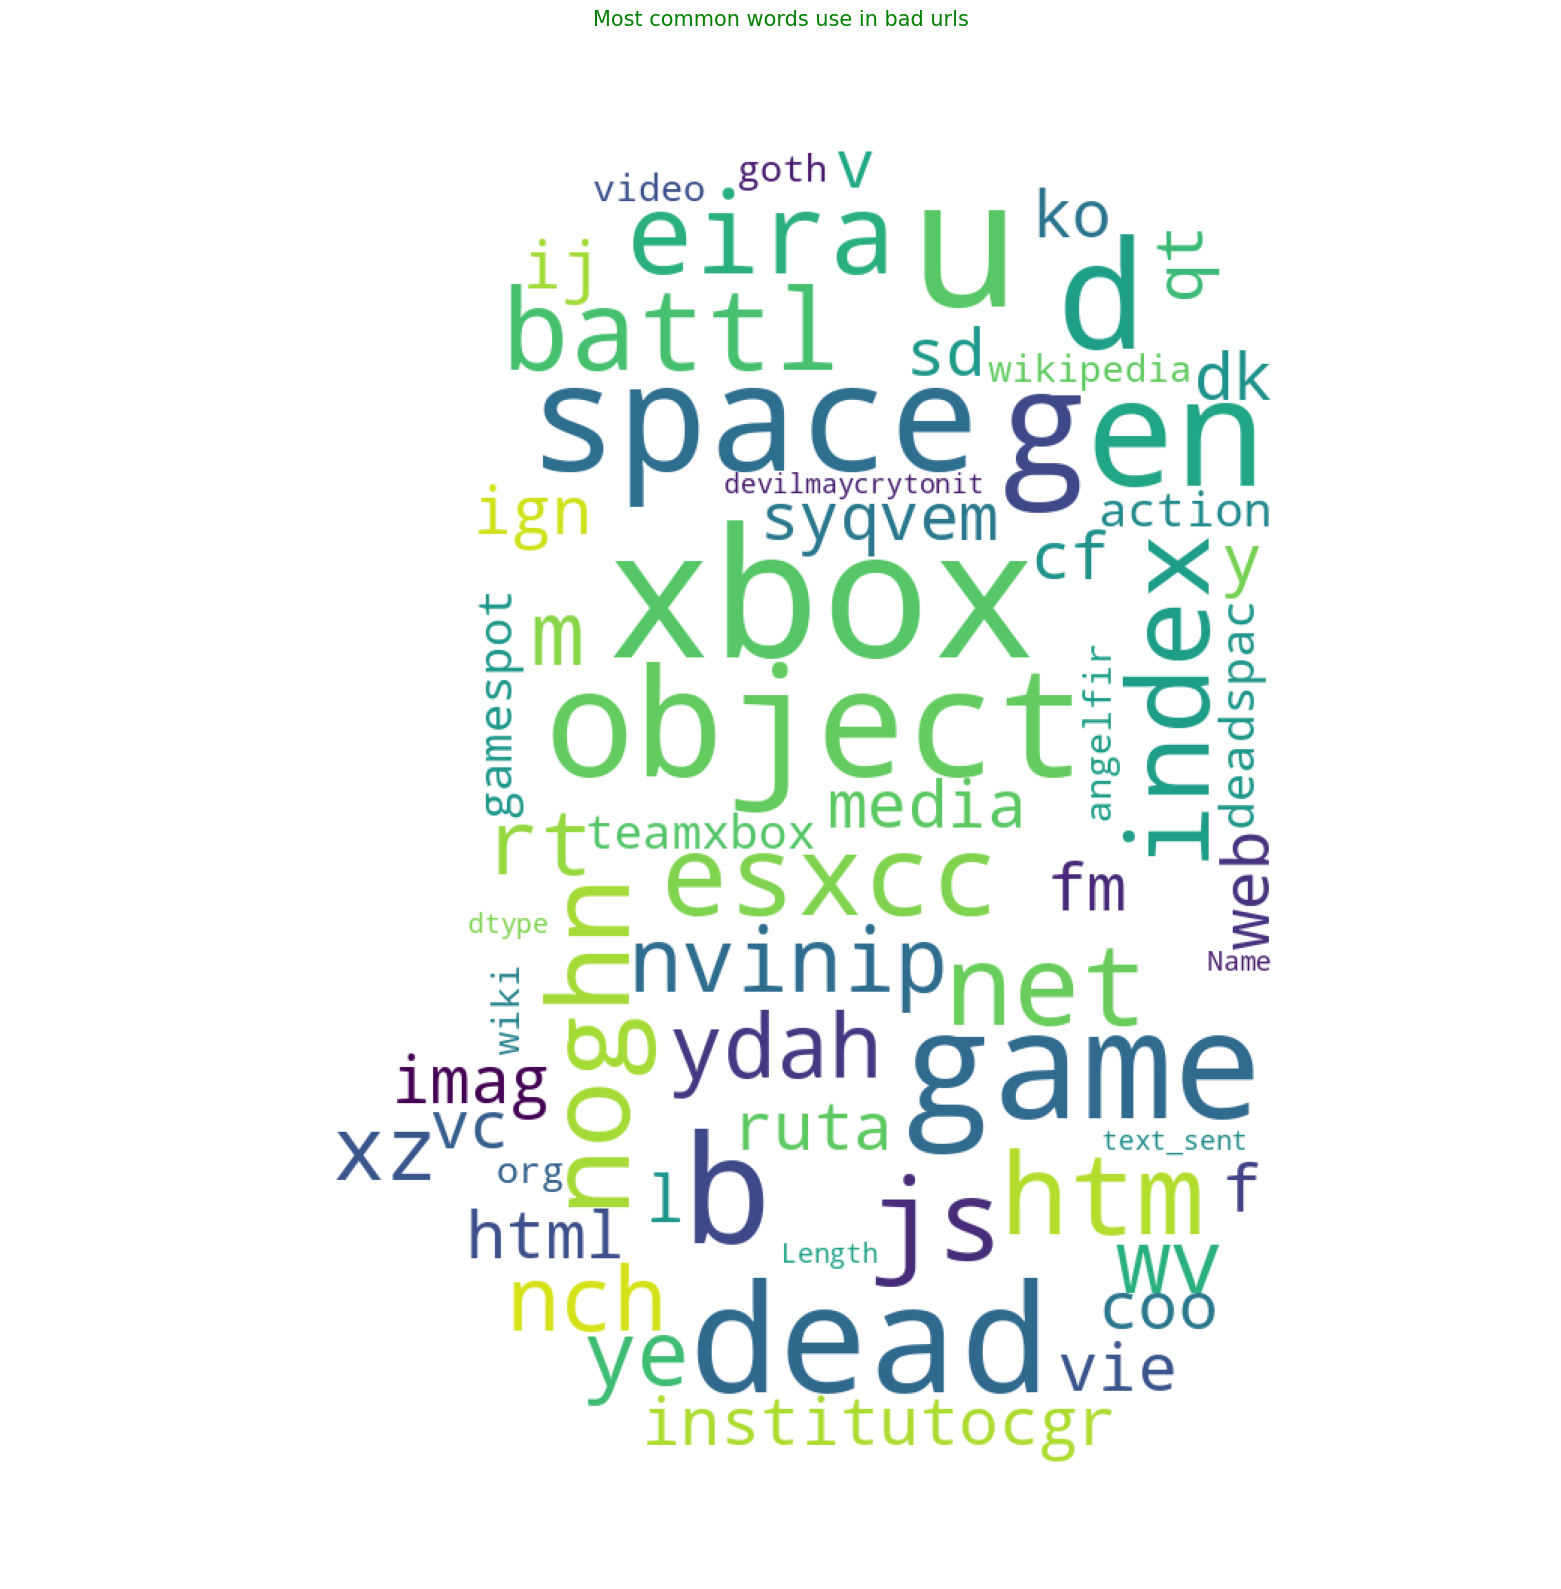

In [65]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

In [67]:
# Save the preprocessed and feature-engineered dataset to a CSV file
processed_file_path = '/content/processed_phishing_urls.csv'  # or any preferred path
df.to_csv(processed_file_path, index=False)

print(f"✅ Preprocessed dataset saved successfully at: {processed_file_path}")
print(f"Shape of saved dataset: {df.shape}")


✅ Preprocessed dataset saved successfully at: /content/processed_phishing_urls.csv
Shape of saved dataset: (103104, 15)
